# Data Analysis and Visualization Project

You have just being employed as the Data Analyst for Coven Credit. As a business, one of our top goals is to ensure we only give loans to the right people so as to minimise loan defaults and maximise revenue. Using the dataset above, generate at least 3 research/business questions that can help Coven Credit improve their business operations.

Prepare your final presentation slides with Jupyter notebook showing the findings being guided by your research questions with at least 5 Charts cutting across Univariate, Bivariate and Multivariate Charts)

**META DATA**

Loan_id: A unique loan number assigned to each loan customers

Loan_status: Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal: Basic principal loan amount at the origination

terms: Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date: When the loan got originated and took effects

Due_date: Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time: The actual time a customer pays off the loan

Pastdue_days: How many days a loan has been past due

Age, education, gender A customer’s basic demographic information

## Work plan
1. Explore Data
2. Clean the Data
3. Write out relevant Research Questions
4. Answer the Questions
5. Visualizations

### 1. Data Loading and Exploration

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile
import plotly.express as px



In [361]:
df = pd.read_csv('Loan payments data.csv')

In [362]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [363]:
df.shape

(500, 11)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [365]:
df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [366]:
#Checking for missing data
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [367]:
df.duplicated().sum()

0

In [368]:
df['Gender'].value_counts()

male      423
female     77
Name: Gender, dtype: int64

In [369]:
df['education'].value_counts()

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64

In [370]:
df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [371]:
df['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [372]:
df['terms'].value_counts()

30    272
15    207
7      21
Name: terms, dtype: int64

In [373]:
df['age'].value_counts()

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
32    20
25    20
37    19
38    19
36    14
23    10
39    10
40     8
22     8
21     7
41     5
46     5
45     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
18     1
49     1
Name: age, dtype: int64

### 2. Cleaning and Organising the Dataset

In [374]:
# Converting the following Columns to Datetime Format
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time']).dt.date
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   400 non-null    datetime64[ns]
 7   past_due_days   200 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.1+ KB


In [376]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [377]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [378]:
df['paid_off_time'].fillna(0,inplace=True)

In [379]:
# Dropping the Loan_ID column because its irrelevant
df.drop('Loan_ID', axis=1, inplace=True)

In [380]:
df.isnull().sum()

loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time       0
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [381]:
df.tail()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-10-11,2016-10-14 00:00:00,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,2016-09-12,2016-09-26,2016-10-10 00:00:00,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,2016-09-12,2016-09-26,2016-09-29 00:00:00,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-11-10,2016-11-11 00:00:00,1.0,38,college,female
499,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-10-11,2016-10-19 00:00:00,8.0,28,High School or Below,male


In [382]:
#correcting typographical error
df['education']= df['education'].replace('Bechalor','Bachelor')

##### Rearranging the columns

In [383]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'paid_off_time', 'past_due_days', 'age', 'education', 'Gender'],
      dtype='object')

In [384]:
df = df[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'paid_off_time','past_due_days', 'age', 'education', 'Gender',]]

In [385]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 00:00:00,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 00:00:00,NaN,50,Bachelor,female
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 00:00:00,NaN,33,Bachelor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 00:00:00,NaN,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 00:00:00,NaN,28,college,female


### 3. Research Questions
0. General Client Demography
1. What is the Loan Status Distribution(age, education, gender)
2. What is the Terms relationship with Principal
3. What is The principal amount relationship with gender and age
4. What is the Percentage of Defaulters#change size of chart

### 4. ANSWERS

**0. General Client Demography**


**AGE**

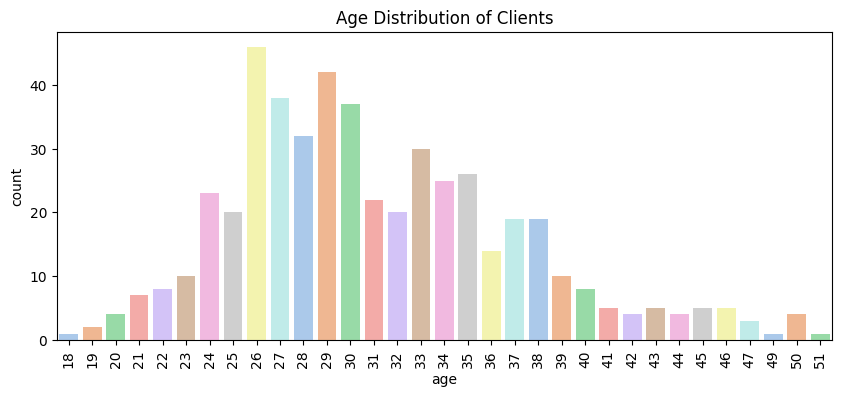

In [386]:
#univariate
#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Age Distribution of Clients")
#rotation
plt.xticks(rotation=90)
sns.countplot(x = 'age', data = df, palette='pastel');

**GENDER**

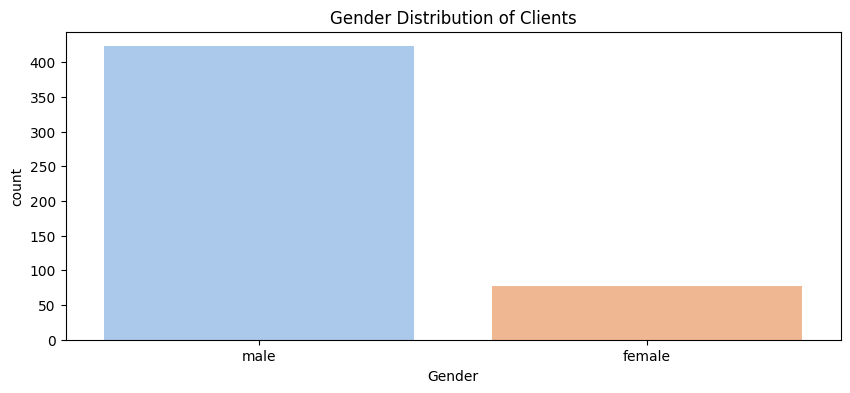

In [387]:
#univariate
#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Gender Distribution of Clients")

sns.countplot(x = 'Gender', data = df, palette='pastel');

The graph Above shows that Males have a higher ratio of loans

**EDUCATIONAL STATUS**

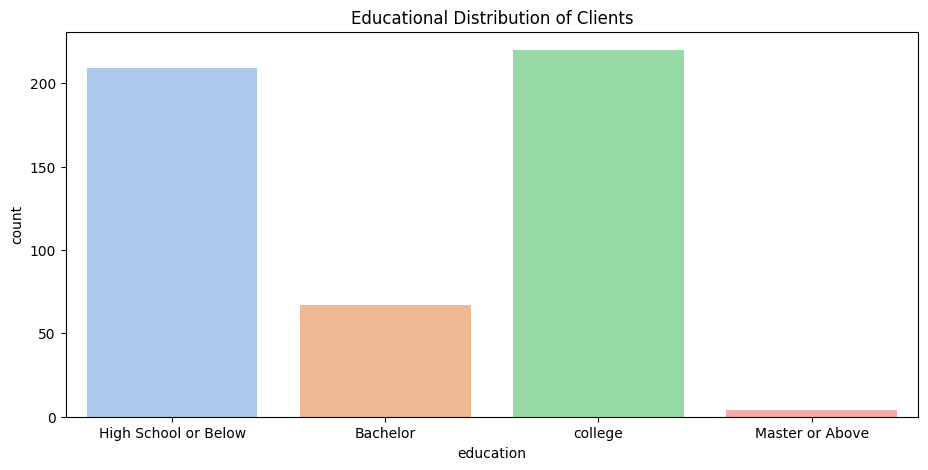

In [388]:
#univariate
#change size of chart
plt.figure(figsize=(11,5)) 
#add title
plt.title("Educational Distribution of Clients")

sns.countplot(x = 'education', data = df, palette='pastel');

The visualisation above shows that most of the loans applied are from college and high school, with the least from masters and bachelor

Which Could be due to application and admission into colleges for study

Very few loan applications for students going for Masters and above degree is observed which might be due to either repayment of the  undergraduate study loans they took

**LOAN STATUS**

In [389]:
loan_status = df['loan_status'].value_counts()
pd.DataFrame(loan_status)

,loan_status
PAIDOFF,300
COLLECTION,100
COLLECTION_PAIDOFF,100


In [390]:
loan_status.index

Index(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype='object')

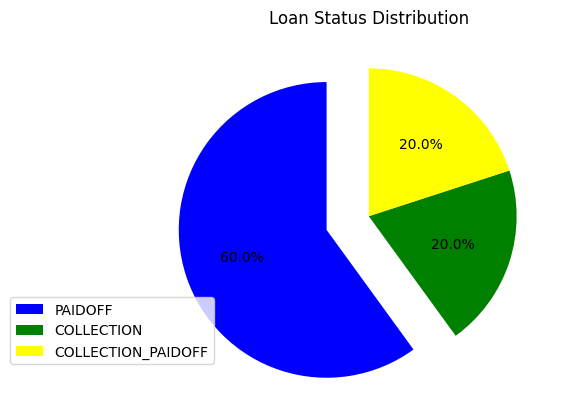

In [391]:
#Univariate
plt.title('Loan Status Distribution')
plt.pie(loan_status, colors=["blue","green","yellow"], autopct='%1.1f%%', explode=[0.3,0,0], startangle=90);
plt.legend(loan_status.index, bbox_to_anchor=(0.1,0.3));


The Chart above shows that 60% of loans are in PAIDOFF State while, 20 % are in Collection and 20% are in CollectionPaidOff status

**TERMS**

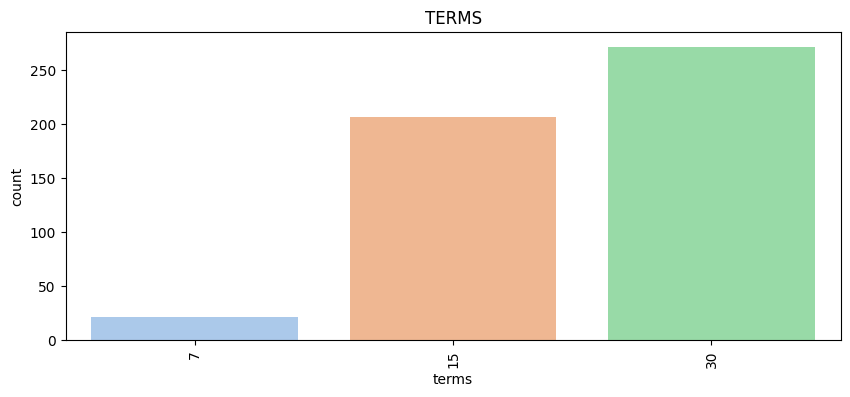

In [392]:
#univariate
#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("TERMS")
#rotation
plt.xticks(rotation=90)
sns.countplot(x = 'terms', data = df, palette='pastel');

30days Terms is the highest sought which might be due to monthly salary payment

**PRINCIPAL**

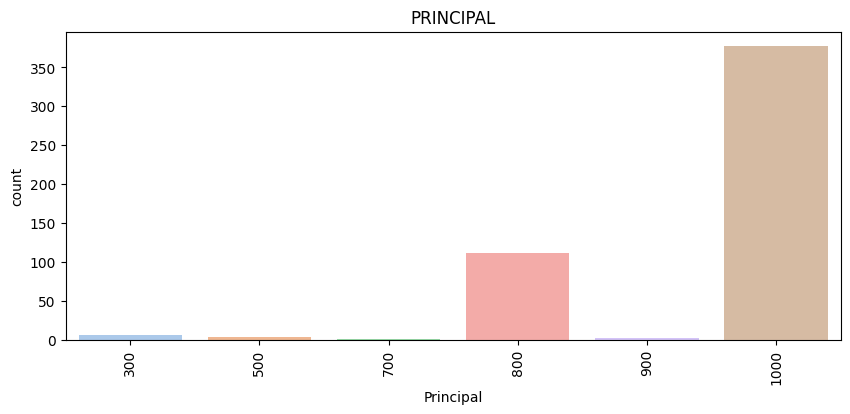

In [393]:
#univariate
#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("PRINCIPAL")
#rotation
plt.xticks(rotation=90)
sns.countplot(x = 'Principal', data = df, palette='pastel');

### 1. What is the Loan Status Distribution(age, education, gender,terms)


**LOAN STATUS VS AGE**

In [394]:
#Age
Age = df['age'].value_counts()
pd.DataFrame(Age)


,age
26,46
29,42
27,38
30,37
28,32
33,30
35,26
34,25
24,23
31,22


In [395]:
df.groupby('loan_status').age.value_counts()

loan_status  age
COLLECTION   26     11
             30      8
             27      7
             29      7
             25      6
                    ..
PAIDOFF      19      2
             46      2
             41      1
             47      1
             51      1
Name: age, Length: 83, dtype: int64

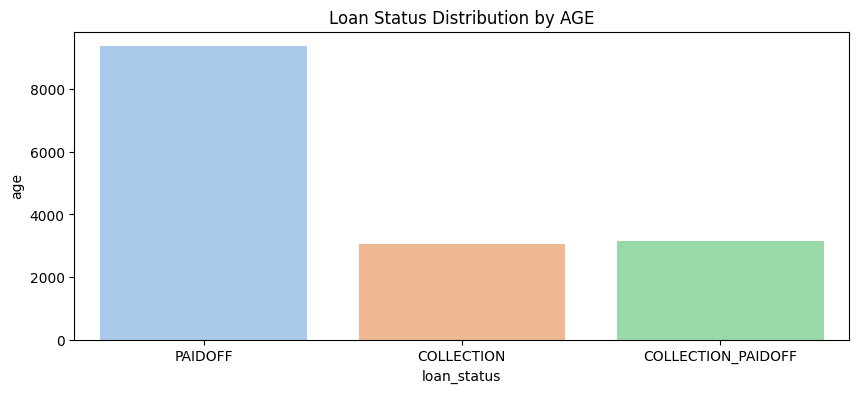

In [396]:
# Bivariate chart

#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Loan Status Distribution by AGE")
#add xlabel
plt.xlabel('Age')
#add ylabel
plt.ylabel('Count')


sns.barplot(data = df, x ='loan_status', y = 'age',palette ='pastel', errorbar=('ci', 0),estimator ='sum');

**LOAN STATUS VS EDUCATION**

In [397]:
df.groupby(by='loan_status').education.value_counts()

loan_status         education           
COLLECTION          High School or Below     49
                    college                  39
                    Bachelor                 11
                    Master or Above           1
COLLECTION_PAIDOFF  college                  48
                    High School or Below     37
                    Bachelor                 15
PAIDOFF             college                 133
                    High School or Below    123
                    Bachelor                 41
                    Master or Above           3
Name: education, dtype: int64

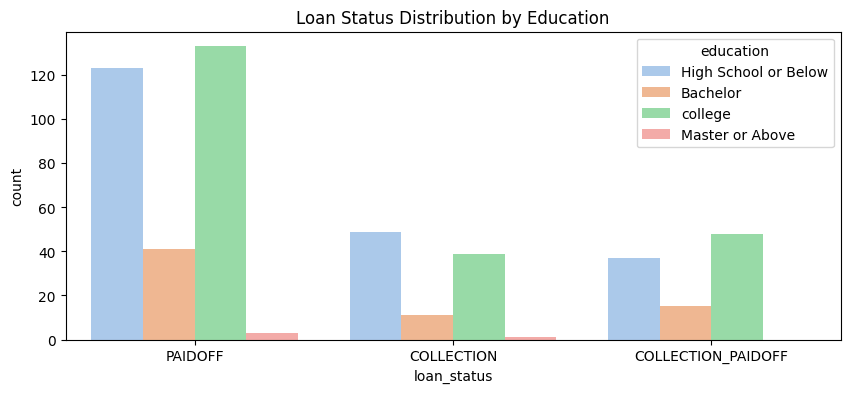

In [398]:
#multivariate chart
#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Loan Status Distribution by Education")
#add xlabel
plt.xlabel('loan_status')
#add ylabel
plt.ylabel('Education')
sns.countplot(data=df, x='loan_status', hue='education', palette='pastel');

<Figure size 1500x500 with 0 Axes>

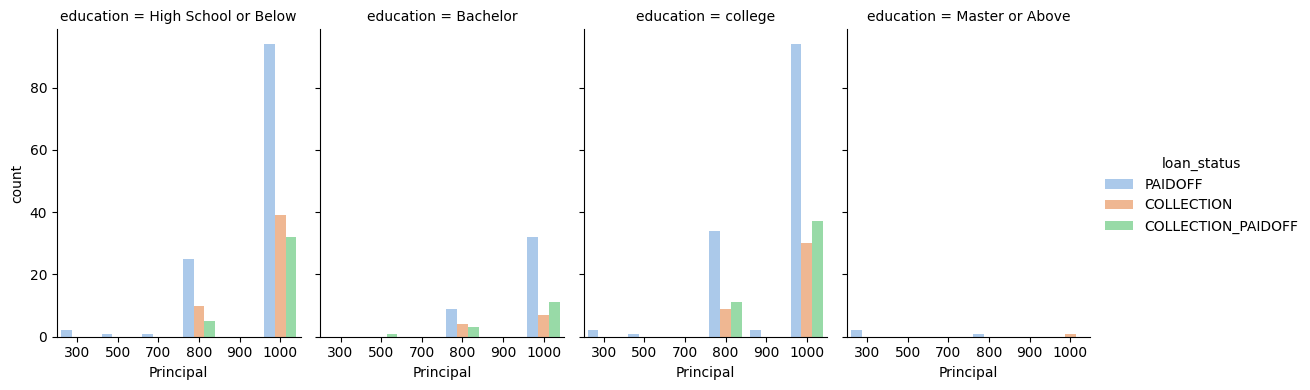

In [399]:
plt.figure(figsize=(15,5));
sns.catplot(x="Principal", hue="loan_status", col="education", col_wrap=4,palette='pastel',
                data=df, kind="count",
                 height=4, aspect=.7);

**LOAN STATUS VS GENDER**

In [400]:
df.groupby(by='loan_status').Gender.value_counts()

loan_status         Gender
COLLECTION          male       90
                    female     10
COLLECTION_PAIDOFF  male       86
                    female     14
PAIDOFF             male      247
                    female     53
Name: Gender, dtype: int64

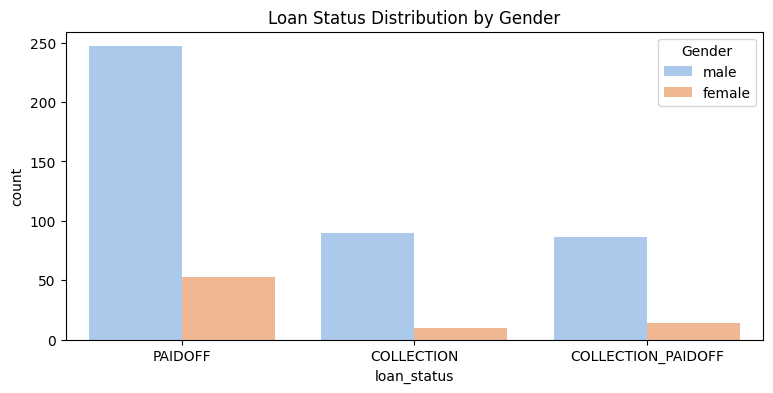

In [401]:
# Multivariatevariate chart

#change size of chart
plt.figure(figsize=(9,4)) 
#add title
plt.title("Loan Status Distribution by Gender")
#add xlabel
plt.xlabel('loan_status')
#add ylabel
plt.ylabel('Education')

sns.countplot(data = df, x= 'loan_status',hue='Gender',palette ='pastel');

**LOAN STATUS VS TERMS**

In [402]:
df.groupby(by='loan_status').terms.value_counts()

loan_status         terms
COLLECTION          30        59
                    15        41
COLLECTION_PAIDOFF  30        60
                    15        39
                    7          1
PAIDOFF             30       153
                    15       127
                    7         20
Name: terms, dtype: int64

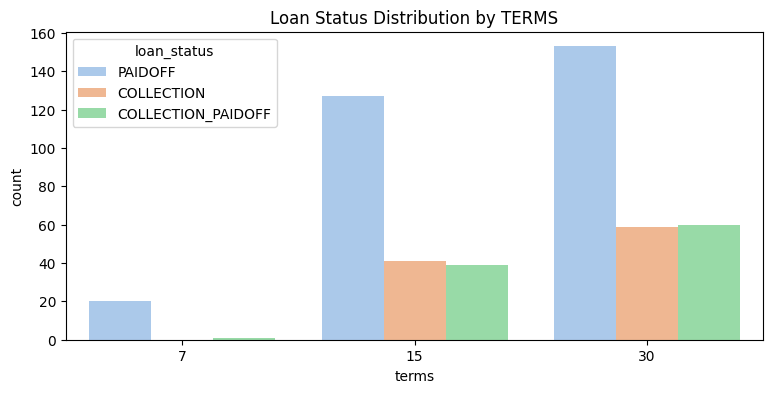

In [403]:
#change size of chart
plt.figure(figsize=(9,4)) 
#add title
plt.title("Loan Status Distribution by TERMS")
#add xlabel
plt.xlabel('loan_status')
#add ylabel
plt.ylabel('Terms')
sns.countplot(x="terms", data=df , hue='loan_status', palette='pastel', linewidth=5);

### 2. What is the Terms relationship with Principal


**Terms vs Principal**

In [404]:
df.groupby(by='terms').Principal.value_counts()


terms  Principal
7      1000          11
       300            6
       800            2
       500            1
       900            1
15     800          103
       1000         100
       500            2
       700            1
       900            1
30     1000         266
       800            6
Name: Principal, dtype: int64

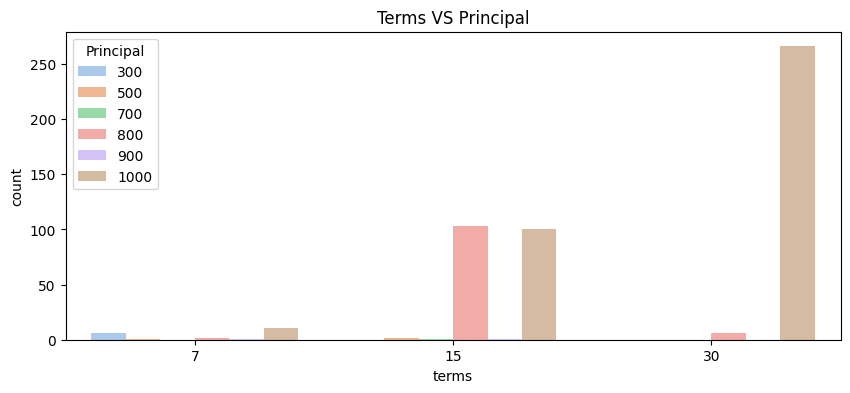

In [405]:
# Bivariate chart

#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Terms VS Principal")
#add xlabel
plt.xlabel('TERMS')
#add ylabel
plt.ylabel('PRINCIPAL')

sns.countplot(data = df, x= 'terms', hue= 'Principal', palette ='pastel');

### 3. What is The principal amount relationship with gender and age

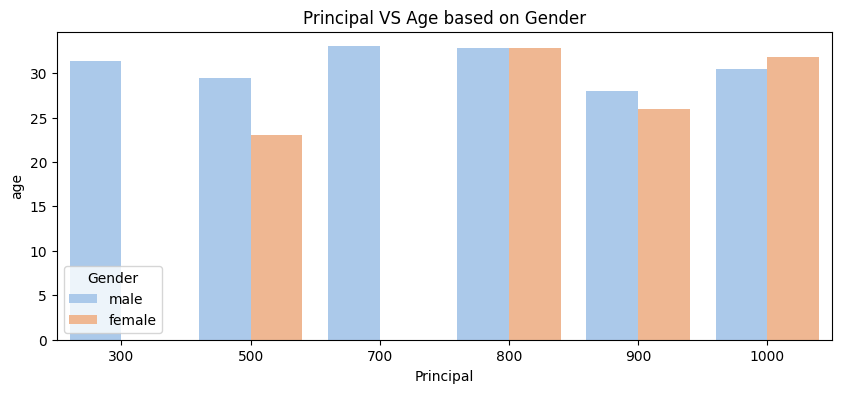

In [416]:
# Bivariate chart

#change size of chart
plt.figure(figsize=(10,4)) 
#add title
plt.title("Principal VS Age based on Gender")
#add xlabel
plt.xlabel('TERMS')
#add ylabel
plt.ylabel('Pastdue_days')

sns.barplot(x="Principal", y="age",hue="Gender" ,palette = 'pastel', errorbar=('ci', 0),  data=df);

<Figure size 2500x500 with 0 Axes>

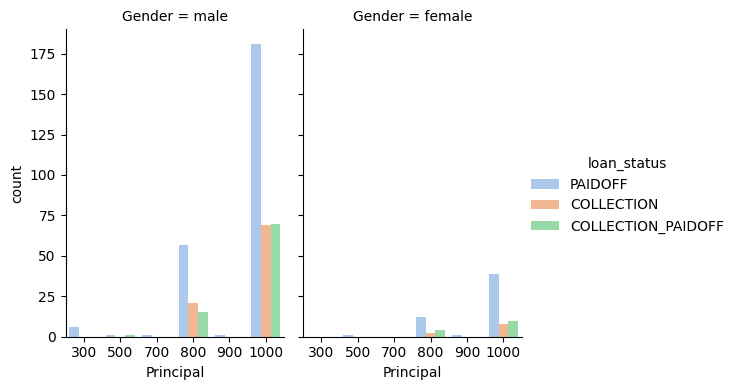

In [409]:
plt.figure(figsize=(25,5));
sns.catplot(x="Principal", hue="loan_status", col="Gender",palette ='pastel',
                data=df, kind="count",
                 height=4, aspect=.7);

### 4. What is the Percentage of Defaulters

In [410]:
defaultPerc=((df.shape[0]-df['past_due_days'].isnull().sum())/df.shape[0])*100
print(defaultPerc,"% of people paid after time")

40.0 % of people paid after time


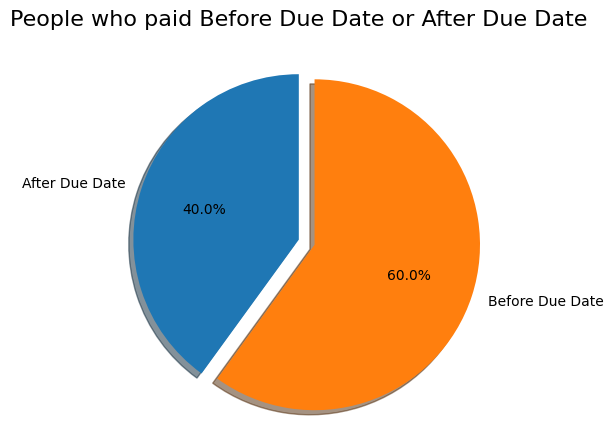

In [414]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'After Due Date', 'Before Due Date'
sizes = [defaultPerc,100-defaultPerc]
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.suptitle('People who paid Before Due Date or After Due Date', fontsize=16)


plt.show()


## CONCLUSION

- majority of People who apply for loans are in College and High School
- People going for higher studies mostly apply for loans with Principal Amount of 800 , 1000
- Male candidates apply wide variety of loans
- 40% of people applying for loans to this bank are defaulters whcih means bank need to work on their policies and recovering rules